# Resume Shortlisting System Using NLP and Machine Learning
## Step 1: Problem Definition
###  About the Dataset

When companies post a job, they often receive hundreds or even thousands of resumes. Going through all of them manually is not easy and takes a lot of time. In IT companies, it is especially challenging because they hire people with different skills like Java, Python, HR, Data Science, and others. So selecting the right person quickly becomes very important. That is why many companies now use machine learning to automatically read and filter resumes. This project uses such a dataset to build a resume shortlisting system.

---
### Business Problem

Recruiters don’t have time to read every resume. As applications increase, it becomes harder to:
- Review resumes manually
- Identify suitable candidates fast
- Reduce the overall time to hire
This can lead to missing out on good talent or hiring delays.
---

###  Project Objective

The main goal of this project is to:
- Automatically read the text of a resume
- Predict what job role the person is best fit for (like Python Developer, HR, etc.)
- Help shortlist resumes faster based on the predicted job role
---

###  Solution Approach

To solve this problem, I used **NLP (Natural Language Processing)** and **Machine Learning**.
Steps I followed:
1. Preprocessed the resume text (cleaned, removed stopwords, etc.)
2. Converted the text into numbers using **TF-IDF**
3. Trained a machine learning model to learn from labele resumes
4. Made the model predict job categories for new resumes

 - This helps automatically **classify and group resumes** into the right job roles.
---
###  Dataset Information

- File Type: CSV
- Total Resumes: 962
- Columns:
  - `Resume` → Full resume in text format
  - `Category` → Job role (label)
- Total Job Categories: 25 (like Java Developer, Data Scientist, HR, etc.)
---

###  What This Project Does

This system looks at the resume text and predicts the most likely job role.  
It helps companies:
- **Shortlist candidates quickly**
- **Organize resumes by role**
- **Save time in the hiring process**
---

### Real Use Case

This project can be useful for:
- HR teams
- Hiring platforms
- Recruitment software
to automatically **filter and sort resumes**, making the hiring process faster and smarter.

### Dataset Source

The dataset used is the **Resume Dataset** from Kaggle:  
[Kaggle - Resume Dataset](https://www.kaggle.com/datasets/gauravduttakiit/resume-dataset)

### Adding Necessary Libraries For The Project

Before we start working on our project, we need to import some important Python libraries.  
These libraries will help us do different tasks like reading the data, cleaning the text, and building the machine learning model.
Here is a quick idea of what each library does:
- `pandas` and `numpy`: Used to read and work with data in tables.
- `re`: Used to clean the text using regular expressions.
- `nltk`: A library for natural language processing. We will use it to remove stopwords and apply stemming.
- `sklearn`: This is a machine learning library. We will use it to:
  - Convert text into numbers using TF-IDF
  - Train the model
  - Test and evaluate how well our model works
- `matplotlib` and `seaborn`: These help us make visual graphs and charts (optional but helpful for understanding results).

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps=PorterStemmer()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\kaviti
[nltk_data]     Akhil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Step 2: Data Understanding 

##### Loading and Analyzing the Data

After loading the dataset, the next step is to understand what kind of data we are working with.

In this step, we will:
- Look at the first few rows of the dataset using `head()`
- Check the number of rows and columns
- Use `info()` to see data types and if there are any missing values
- Use `value_counts()` to see how many resumes are there for each job role
This helps us get a clear idea of the structure of the dataset and plan the next steps like cleaning and preprocessing.

### Understanding the Dataset

This dataset has two columns:
1. **Resume** – This column has the full resume text written by the person.  
2. **Category** – This column tells us what job role the resume belongs to (like Python Developer, HR, etc.)
We will use this data to build a model that can read a resume and guess the correct job role.

In [2]:
df = pd.read_csv('UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


##### <U> Dataset Shape </U>

To check the number of rows and columns in the dataset, use the `.shape` property:

In [3]:
df.shape

(962, 2)

##### Quick Data Overview:

Use the following command  to see a quick summary of your dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


##### Checking Resume Count by Job Role

Now let’s see how many resumes are available for each job role.  
This helps us understand if the dataset is balanced or if some roles have more data than others.

In [5]:
# Checking the number of resumes for each job category
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

##### <u> Checking for Missing Values  </u>

In [6]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

- After checking the dataset, we found that there are **no missing values** in any of the columns.
- This means we don’t need to fill or drop any data, and we can move forward with text cleaning and model building.

##### <u> Checking for Duplicate Values  </u>

In [7]:
df.duplicated().sum()

np.int64(796)

We found that there are 796 duplicate rows in the dataset.
But I decided **not to remove them**. This is because:
- In real life, the same person might apply more than once using the same resume.
- Some resumes may look similar but could still be useful.
- Removing them might cause us to lose important information.

So, I chose to keep all the rows in the dataset and continue with the project.

## Step 3: Exploratory Data Analysis (EDA)

1. Count of Resumes per Job Role

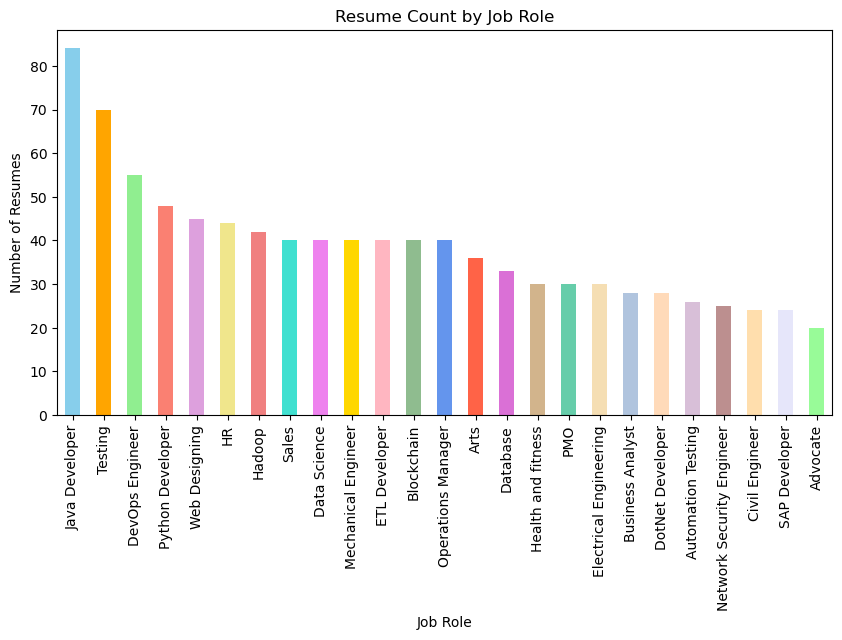

In [8]:
# Count job role
job_counts = df['Category'].value_counts()

# Plot the bar chart
job_counts.plot(kind='bar', figsize=(10, 5), color = ['skyblue', 'orange', 'lightgreen', 'salmon', 'plum', 'khaki', 'lightcoral', 
          'turquoise', 'violet', 'gold', 'lightpink', 'darkseagreen', 'cornflowerblue',
          'tomato', 'orchid', 'tan', 'mediumaquamarine', 'wheat', 'lightsteelblue', 'peachpuff',
          'thistle', 'rosybrown', 'navajowhite', 'lavender', 'palegreen'])

# Add labels and title
plt.title("Resume Count by Job Role")
plt.xlabel("Job Role")
plt.ylabel("Number of Resumes")
plt.show()

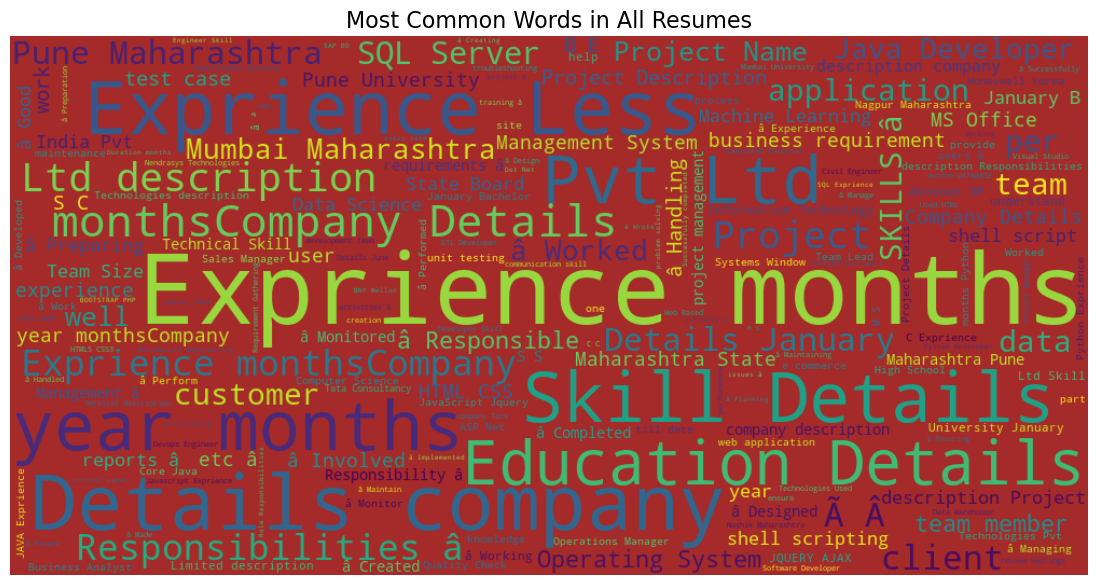

In [9]:
!pip install wordcloud
from wordcloud import WordCloud
# Combine all resume texts
all_text = " ".join(df['Resume'])

# Create word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='brown').generate(all_text)

# Show the word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in All Resumes", fontsize=16)
plt.show()

### What I Observed from the Word Cloud

After looking at the word cloud, I noticed that some words are really big.  
This means they appear very often in the resumes.
Some of the biggest words I saw were:
- **project**
- **exprience**
- **Education Details**
- **skills**
- **pvt Ltd**
----
These are probably the most common skills or topics that people talk about in their resumes.
There were also some smaller words like:
- **sql**
- **html**
- **javascript**
- **testing**
- **python**
- These words are still important, but not as common as the big ones.
- Overall, the word cloud gives a quick and easy way to see what people focus on the most in their resumes.

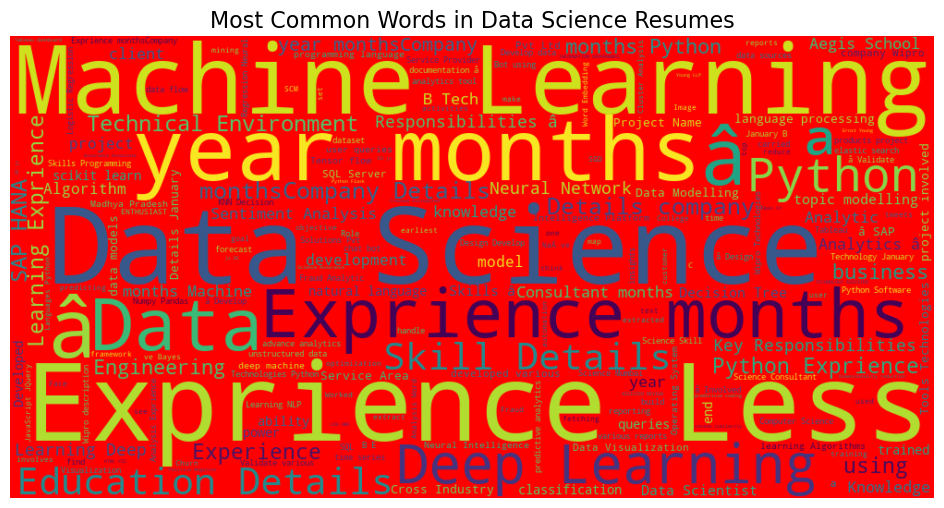

In [10]:
# Function to create word cloud for a specific job role
def generate_wordcloud_for_role(role):
    text = " ".join(df[df['Category'] == role]['Resume'])
    wordcloud = WordCloud(width=1000, height=500, background_color='red').generate(text)
    # Show the word cloud
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Most Common Words in {role} Resumes", fontsize=16)
    plt.show()
# Example: Data Science resumes
generate_wordcloud_for_role("Data Science")

### What I Observed in the Data Science Word Cloud
After generating the word cloud for **Data Science** resumes, I noticed some big and common words.
The biggest words were:
- **python**
- **data**
- **machine**
- **learning**
- **model**
- **Exprience**
 -----
These are important skills in data science, so it's good to see them appear a lot.
There were also some smaller words like:
- **sql**
- **numpy**
- **algorithms**
- **pandas**
- **model**
- This tells me that most people applying for data science jobs talk about tools and topics related to programming, data handling, and machine learning.
- So this word cloud gives a good idea of what kind of skills are common in data science resumes.

## Step 4: Text Preprocessing

### Text Cleaning (Creating the Corpus)
Now we clean the resume text to prepare it for the model.  
We do this step to remove unwanted characters and make the text easier for the machine to understand.
Steps we followed:
- Removed special characters and numbers (kept only letters)
- Converted all text to lowercase
- Split the text into words
- Removed common stopwords like "the", "is", "and", etc.
- Joined the cleaned words back into one string
We repeat this for every resume and save all the cleaned resumes into a list called `corpus`.
This cleaned text will be used to extract features for training the model.

In [11]:
corpus=[]
for i in range(len(df)):
    rp=re.sub('[^a-zA-Z]'," ",df['Resume'][i])
    rp=rp.lower()
    rp=rp.split()
    rp=[word for word in rp if not word in set(stopwords.words('english'))]
    rp=" ".join(rp)
    corpus.append(rp)

### Converting Resume Text into Numbers (TF-IDF)
Now we change all the cleaned text into numbers so that the computer can understand it.
We use something called **TF-IDF**, which gives a score to each word:
- Words that are common in all resumes get a lower score.
- Words that are important or unique get a higher score.
Steps:
1. We create a tool called `TfidfVectorizer`
2. We use it to change all the resumes into number format
3. The result is stored in `X`
Now every resume is a row of numbers, and we are ready to train the machine learning model.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer()
X = cv.fit_transform(corpus).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Encoding the Job Roles
- The resume text is already turned into numbers using TF-IDF, so we don’t need to encode it again.
- But our job roles (like "HR", "Python Developer") are in text format.  
- So we use `LabelEncoder` to give each job role a unique number.
- This helps the machine learning model understand the job roles while training.
- We used `LabelEncoder` to turn job role labels into numbers.  
- This is safe and common in classification tasks, as it only helps the model understand the output labels.
Example:
- "HR" → 0
- "Python Developer" → 1
- "Data Scientist" → 2

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['Category'])  

### Step 5: Modelling

<U>Train Test Split</U>
- We are splitting the dataset into:
- **80% training data**
- **20% testing data**

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
#------Creating a DataFrame that stores all the metrics and performance of each model which will help in Model Selection----------------
algorithms = ['Naive Bayes','logistic_Model',  'svm_Model',]
metrics = ['TrainAccuracy', 'TestAccuracy', 'TrainPrecision', 'TestPrecision','TrainRecall', 'TestRecall',
          'TrainF1', 'TestF1', 'CV']

analysis_df = pd.DataFrame(index=algorithms, columns=metrics)

In [16]:
#-----DataFrame to store metrics useful for further analysis and Model Selection-------------------------
analysis_df

,TrainAccuracy,TestAccuracy,TrainPrecision,TestPrecision,TrainRecall,TestRecall,TrainF1,TestF1,CV
Naive Bayes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
logistic_Model,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
svm_Model,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#---Function that calculates all the metrics and Classification report and updatas values in the analysis_df DataFrame--------------------
def model_performance(model_key, model_obj, X_train, y_train, X_test, y_test, analysis_df):
    y_train_pred = model_obj.predict(X_train)
    y_test_pred = model_obj.predict(X_test)

    analysis_df.loc[model_key, 'TrainAccuracy'] = accuracy_score(y_train, y_train_pred)
    analysis_df.loc[model_key, 'TestAccuracy'] = accuracy_score(y_test, y_test_pred)
    analysis_df.loc[model_key, 'TrainPrecision'] = precision_score(y_train, y_train_pred, average='weighted')# 
    analysis_df.loc[model_key, 'TestPrecision'] = precision_score(y_test, y_test_pred, average='weighted')
    analysis_df.loc[model_key, 'TrainRecall'] = recall_score(y_train, y_train_pred, average='weighted')
    analysis_df.loc[model_key, 'TestRecall'] = recall_score(y_test, y_test_pred, average='weighted')
    analysis_df.loc[model_key, 'TrainF1'] = f1_score(y_train, y_train_pred, average='weighted')
    analysis_df.loc[model_key, 'TestF1'] = f1_score(y_test, y_test_pred, average='weighted')


    cv_score = cross_val_score(model_obj, X_train, y_train, cv=5, scoring='accuracy').mean()
    analysis_df.loc[model_key, 'CV'] = cv_score

    print(f'📘 Classification Report — {model_key} (Train)')
    print(classification_report(y_train, y_train_pred))
    print(f'📘 Classification Report — {model_key} (Test)')
    print(classification_report(y_test, y_test_pred))

    # Confusion Matrix - Train
    cm_train = confusion_matrix(y_train, y_train_pred)
    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
    disp_train.plot(cmap='Reds')
    plt.title(f'{model_key} — Confusion Matrix (Train)')
    plt.show()

    # Confusion Matrix - Test
    cm_test = confusion_matrix(y_test, y_test_pred)
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
    disp_test.plot(cmap='Greens')
    plt.title(f'{model_key} — Confusion Matrix (Test)')
    plt.show()
    return analysis_df

### Model Training - Naive Bayes
- We now train our machine learning model using **Naive Bayes**, which is commonly used for text classification tasks.
- This algorithm works well when features are TF-IDF values.
Steps:
- Fit the model using the training data (`X_train`, `y_train`)
- Predict the categories for the test data (`X_test`)
This will help us evaluate how well the model can classify resumes into the correct job roles.

In [18]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

### Model Evaluation - Naive Bayes

In [19]:
model.fit(X_train,y_train)  
ypred_train = model.predict(X_train)
from sklearn.metrics import accuracy_score
print("TRAIN ACCURACY ",accuracy_score(y_train,ypred_train))
from sklearn.model_selection import cross_val_score
print("THE CV SCORE(accuracy  of model)",cross_val_score(model,X_train,y_train,cv=5,scoring="accuracy").mean())
ypred_test= model.predict(X_test)
print("TEST ACCURACY ",accuracy_score(y_test,ypred_test))          

TRAIN ACCURACY  0.9830949284785435
THE CV SCORE(accuracy  of model) 0.9115779645191411
TEST ACCURACY  0.9792746113989638


### Model Evaluation Results
The Naive Bayes model performed very well:
- **Training Accuracy**: 98.3%
- **Cross-Validation Accuracy**: 91.1%
- **Test Accuracy**: 97.9%
These results show that:
- The model fits the training data well
- It is  overfitting.

#### Trying Other Machine Learning Algorithms
To improve our model and make the project more complete, we also applied two other popular algorithms:
1. **Logistic Regression**  
   - Widely used for text classification tasks  
   - Works well with TF-IDF features  
   - Good at handling multiple classes
2. **Support Vector Machine (SVM)**  
   - Powerful algorithm for high-dimensional data like text  
   - Finds the best boundary between classes  
   - Often gives high accuracy but may take more time to train
- We trained both models on the same TF-IDF features and compared their results with Naive Bayes.

📘 Classification Report — Naive Bayes (Train)
              precision    recall  f1-score   support

           0       1.00      0.76      0.87        17
           1       1.00      1.00      1.00        30
           2       1.00      0.81      0.89        21
           3       1.00      1.00      1.00        33
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        35
           7       1.00      1.00      1.00        25
           8       1.00      0.95      0.97        41
           9       1.00      1.00      1.00        23
          10       1.00      1.00      1.00        33
          11       1.00      1.00      1.00        24
          12       1.00      0.91      0.95        32
          13       1.00      1.00      1.00        38
          14       1.00      1.00      1.00        23
          15       0.85      1.00      0.92        69
          16       1.00      1.00  

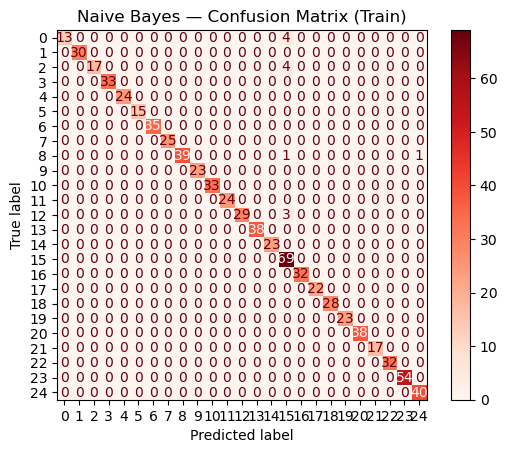

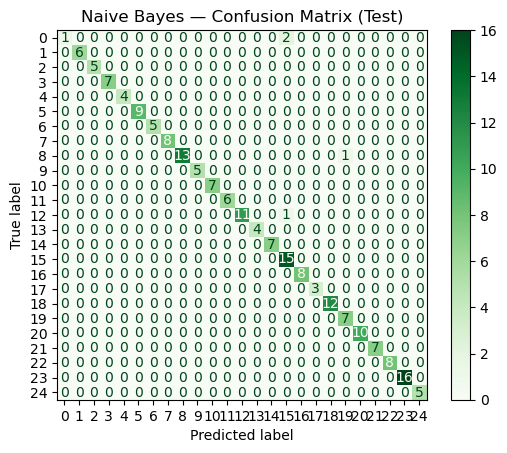

In [20]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)
NavieBayes_Model_Report = model_performance('Naive Bayes', model, X_train, y_train, X_test, y_test, analysis_df)

### Model Training - Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
Lr= LogisticRegression()
Lr.fit(X_train,y_train)

LogisticRegression()

In [22]:
ypred_train = Lr.predict(X_train)
print("TRAIN ACCURACY ",accuracy_score(y_train,ypred_train))
print("THE CV SCORE(accuracy  of model)",cross_val_score(Lr,X_train,y_train,cv=5,scoring="accuracy").mean())
ypred_test= Lr.predict(X_test)
print("TEST ACCURACY ",accuracy_score(y_test,ypred_test))

TRAIN ACCURACY  0.9973992197659298
THE CV SCORE(accuracy  of model) 0.9935064935064934
TEST ACCURACY  0.9948186528497409


📘 Classification Report — logistic_Model (Train)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        30
           2       0.95      1.00      0.98        21
           3       1.00      1.00      1.00        33
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        35
           7       1.00      1.00      1.00        25
           8       1.00      0.95      0.97        41
           9       0.96      1.00      0.98        23
          10       1.00      1.00      1.00        33
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00        38
          14       1.00      1.00      1.00        23
          15       1.00      1.00      1.00        69
          16       1.00      1.0

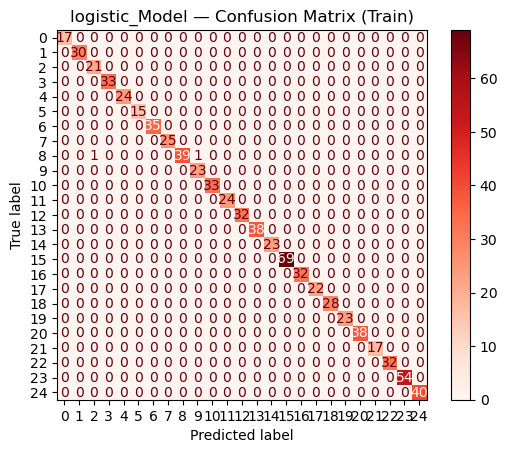

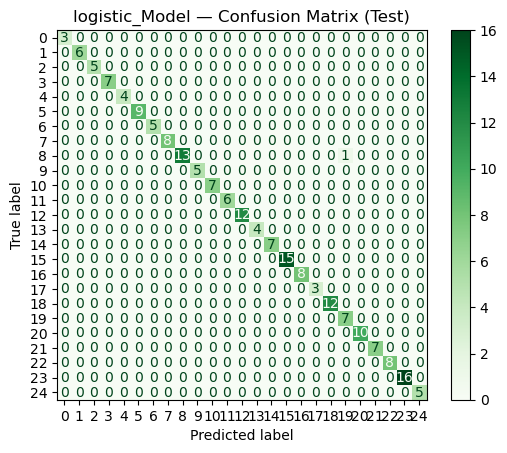

In [23]:
logistic_Model_Report = model_performance('logistic_Model', Lr, X_train, y_train, X_test, y_test, analysis_df)

### Model Training - Support Vector Machine

#####  FIRST TRY WITHDEFAULT PARAMS 

In [24]:
from sklearn.svm import SVC
svm = SVC(C=1,kernel="rbf")
svm.fit(X_train, y_train)
ypred_train = svm.predict(X_train)
print("TRAIN ACCURACY ",accuracy_score(y_train,ypred_train))
print("THE CV SCORE(accuracy  of model)",cross_val_score(svm,X_train,y_train,cv=5,scoring="accuracy").mean())
ypred_test= svm.predict(X_test)
print("TEST ACCURACY",accuracy_score(y_test,ypred_test))    # Default value of c is 1 and kernel is rbf

TRAIN ACCURACY  1.0
THE CV SCORE(accuracy  of model) 0.9935064935064934
TEST ACCURACY 0.9948186528497409


#### Hyperparameter Tuning For Svm Classifier

In [25]:
from sklearn.model_selection import GridSearchCV
estimator= SVC()
param_grid={"C":  [0,0.1,0.5, 1],"kernel":["linear","rbf","sigmoid","poly"]}
grid=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)
grid.best_params_                                                   

C:\Users\kaviti Akhil\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kaviti Akhil\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kaviti Akhil\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\kaviti Akhil\anaconda3\Lib\site-packages\sklearn\base.py", line 4

{'C': 0.5, 'kernel': 'linear'}

In [26]:
### Apply The SVM WITH BEST PARAMETERS

In [27]:
svm = SVC(C=0.5,kernel="linear")
svm.fit(X_train, y_train)
ypred_train = svm.predict(X_train)
print("TRAIN ACCURACY ",accuracy_score(y_train,ypred_train))
print("THE CV SCORE(accuracy  of model)",cross_val_score(svm,X_train,y_train,cv=5,scoring="accuracy").mean())
ypred_test= svm.predict(X_test)
print("TEST ACCURACY",accuracy_score(y_test,ypred_test))

TRAIN ACCURACY  0.9986996098829649
THE CV SCORE(accuracy  of model) 0.9935064935064934
TEST ACCURACY 0.9948186528497409


📘 Classification Report — svm_Model (Train)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        30
           2       0.95      1.00      0.98        21
           3       1.00      1.00      1.00        33
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        35
           7       1.00      1.00      1.00        25
           8       1.00      0.98      0.99        41
           9       1.00      1.00      1.00        23
          10       1.00      1.00      1.00        33
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00        38
          14       1.00      1.00      1.00        23
          15       1.00      1.00      1.00        69
          16       1.00      1.00    

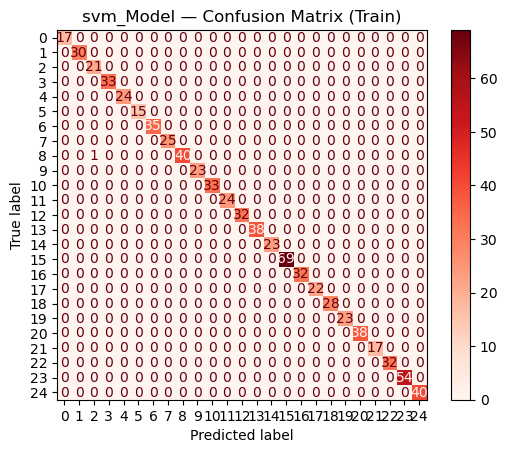

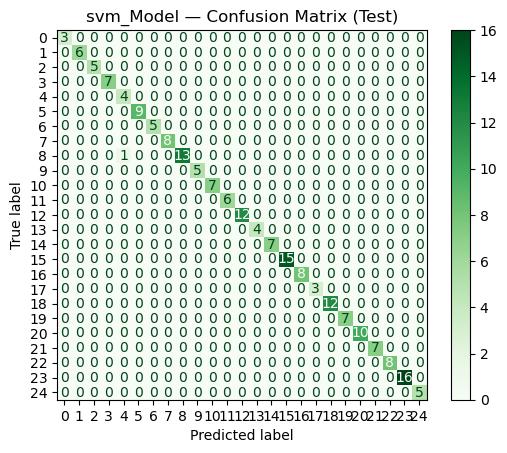

In [28]:
svm_Model_Report = model_performance('svm_Model', svm, X_train, y_train, X_test, y_test, analysis_df)

In [29]:
analysis_df

,TrainAccuracy,TestAccuracy,TrainPrecision,TestPrecision,TrainRecall,TestRecall,TrainF1,TestF1,CV
Naive Bayes,0.983095,0.979275,0.985438,0.982513,0.983095,0.979275,0.982978,0.977355,0.911578
logistic_Model,0.997399,0.994819,0.997513,0.995466,0.997399,0.994819,0.997396,0.994895,0.993506
svm_Model,0.9987,0.994819,0.998759,0.995855,0.9987,0.994819,0.998707,0.995011,0.993506


### Final Model Selection
We tested three models: Naive Bayes, Logistic Regression, and Support Vector Machine (SVM).
- **Naive Bayes** performed well but had slightly lower accuracy and cross-validation scores.
- **Logistic Regression** and **SVM** both achieved over 99% accuracy and F1-scores, making them excellent choices.
- **SVM** had the highest F1-score, but Logistic Regression was equally strong and faster to train.
-  Best Model : **Support Vector Machine (SVM)** as the best-performing model.

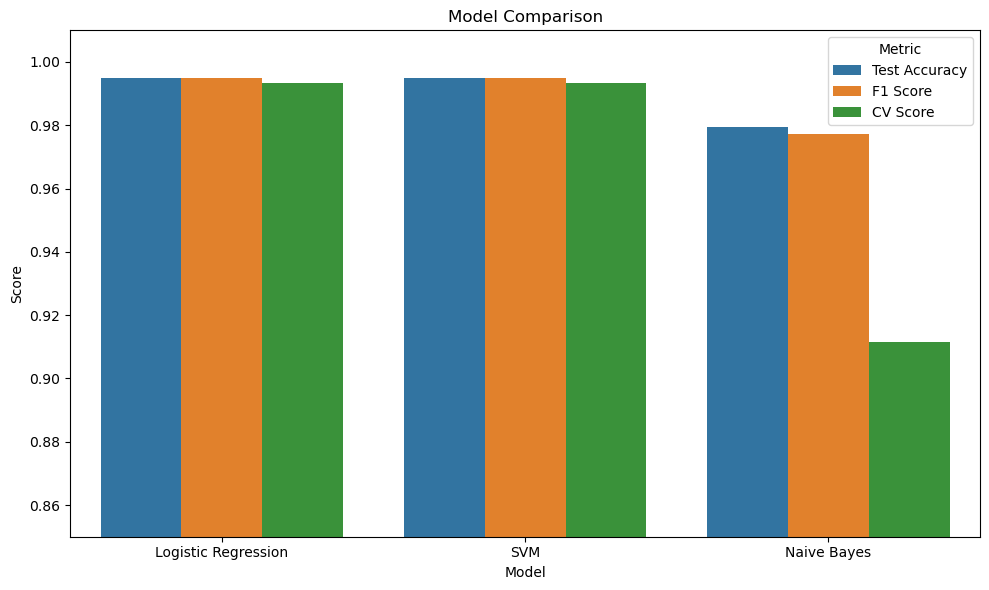

In [30]:
# Model results
data = {
    'Model': ['Logistic Regression', 'SVM', 'Naive Bayes'],
    'Test Accuracy': [0.9948, 0.9948, 0.9793],
    'F1 Score': [0.9949, 0.9950, 0.9774],
    'CV Score': [0.9935, 0.9935, 0.9116]
}
# Create DataFrame
df2 = pd.DataFrame(data)

# Convert to long format for plotting
df_melted = df2.melt(id_vars='Model', var_name='Metric', value_name='Score')
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric')
plt.title('Model Comparison')
plt.ylim(0.85, 1.01)
plt.tight_layout()
plt.show()

### Save The Model

In [31]:
import joblib
# Save the trained model (e.g., SVM)
print(joblib.dump(svm, 'svm_resume_model.pkl'))
# Save the TF-IDF vectorizer
print(joblib.dump(cv, 'tfidf_vectorizer.pkl'))
# Save LabelEncoder if you want to convert back labels later
print(joblib.dump(le, 'label_encoder.pkl'))

['svm_resume_model.pkl']
['tfidf_vectorizer.pkl']
['label_encoder.pkl']


### Steps to be followed after saving the model 

##### step1:Load the Model

In [32]:
# Load everything when needed
model = joblib.load('svm_resume_model.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')
label_encoder = joblib.load('label_encoder.pkl')

##### Step 2: Accept New Data ( through user input)

In [33]:
new_resume = "Experienced Java developer with strong backend skills and REST API knowledge."

##### Step 3: Clean the Input Resume (Same as Training)

In [34]:
import re
from nltk.corpus import stopwords

def clean_text(text):
    # Remove non-letter characters
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Convert to lowercase and split into words
    words = text.lower().split()
    # Get English stopwords once
    stop_words = set(stopwords.words('english'))
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    # Join and strip
    return ' '.join(words).strip()

# Example usage
cleaned_resume = clean_text(new_resume) # Clean the input resume

##### Step 4: Make Predictions

In [35]:
# Step 1: Transform the cleaned resume using the saved TF-IDF vectorizer
transformed_resume = vectorizer.transform([cleaned_resume]).toarray()

# Step 2: Predict the job category using the loaded model
predicted_label = model.predict(transformed_resume)

# Step 3: Decode the predicted label back to the original category
predicted_role = label_encoder.inverse_transform(predicted_label)

# Step 4: Show the final result
print("✅ Predicted Job Role:", predicted_role[0])

✅ Predicted Job Role: Java Developer


###  Final Conclusion

We developed a Resume Shortlisting System using Natural Language Processing (NLP) and machine learning.  
The system reads resume text, extracts important features using TF-IDF, and predicts the most suitable job role.

Three models were tested:
- Naive Bayes
- Logistic Regression
- Support Vector Machine (SVM)

 **Model Performance Summary:**

| Model                | Test Accuracy | F1-Score | CV Score |
|---------------------|---------------|----------|----------|
| Naive Bayes         | 97.93%        | 97.73%   | 91.15%   |
| Logistic Regression | 99.48%        | 99.49%   | 99.35%   |
| **SVM (Best)**      | **99.48%**    | **99.50%** | **99.35%** |

 **Final Model Selected:** **Support Vector Machine (SVM)**  
SVM achieved the best F1-score and generalization performance, making it the most reliable choice.

 **Use of the Project:**  
This system can help HR teams automatically shortlist resumes based on job relevance.  
It saves time, reduces manual effort, and ensures fair, consistent filtering of candidates.